# **Numerical Analysis Term Project – MAT353**

## Numerical Investigation of Transient Heat Dissipation in a Thin Rod with Fixed-End Cooling

**Student:** Mert Eldemir  
**Student Number:** 25120205086  

---

### Project Overview

In this project, we investigate the **transient heat dissipation process in a thin one-dimensional rod**
whose ends are maintained at a fixed temperature.
This physical setup models practical cooling scenarios encountered in
engineering applications such as heat sinks, thermal rods, and conduction-dominated systems.

The temperature evolution inside the rod is governed by a diffusion-type partial differential equation.
Instead of focusing on a generic simulation, the primary goal of this study is to
**analyze the numerical behavior of explicit finite difference schemes**
when applied to a realistic cooling problem.

The heat transfer model is solved numerically using **finite difference methods**, and the results are
examined in terms of **stability, accuracy, error behavior, and convergence under grid refinement**.
The numerical solutions are also compared against an analytical reference solution
to validate correctness and quantify discretization errors.


## 1. Mathematical Model: Transient Heat Dissipation in a Thin Rod

The physical system considered in this study is a thin, homogeneous rod of length $L$,
initially heated and then allowed to cool while its ends are kept at a fixed temperature.

Under the assumption that heat transfer occurs only along the rod’s length
and that internal heat sources are absent,
the temperature evolution is governed by the one-dimensional heat diffusion equation:

$$
\frac{\partial u(x,t)}{\partial t}
=
\alpha \frac{\partial^2 u(x,t)}{\partial x^2},
\quad 0 < x < L,\; t > 0
$$

where:
- $u(x,t)$ denotes the temperature distribution along the rod,
- $\alpha > 0$ is the thermal diffusivity coefficient of the material,
- $x$ is the spatial coordinate along the rod,
- $t$ represents time.

### Initial Condition

The initial temperature distribution is selected as:

$$
u(x,0) = \sin\!\left(\frac{\pi x}{L}\right)
$$

This configuration represents a rod that is initially hottest at its center
and cooler toward the ends, providing a smooth and physically meaningful
starting profile for the cooling process.

### Boundary Conditions

The rod ends are assumed to be perfectly cooled, leading to fixed-temperature boundary conditions:

$$
u(0,t) = 0, \quad u(L,t) = 0 \quad \text{for all } t \ge 0
$$

These **Dirichlet boundary conditions** model an idealized cooling mechanism,
where heat is continuously removed at the rod boundaries.


## 2. Discretization of Space and Time

To numerically simulate the transient cooling process,
the continuous spatial and temporal domains are discretized
using uniform grids.

### Spatial Discretization

The rod of length $L$ is divided into $N$ equal segments,
leading to a spatial step size:

$$
\Delta x = \frac{L}{N}
$$

The spatial grid points are defined as:

$$
x_i = i \Delta x, \quad i = 0,1,\dots,N
$$

### Temporal Discretization

Time is discretized using a constant time step $\Delta t$,
resulting in discrete time levels:

$$
t^n = n \Delta t, \quad n = 0,1,2,\dots
$$

### Discrete Temperature Approximation

The numerical approximation of the temperature field is denoted by:

$$
u_i^n \approx u(x_i, t^n)
$$

Here, $u_i^n$ represents the approximate temperature
at spatial position $x_i$ and time level $t^n$.


In [31]:
# importing the main libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
# Physical parameters
L = 1.0        # Length of the rod
alpha = 1.0    # Thermal diffusivity coefficient

# Numerical parameters
N = 50         # Number of spatial intervals
dx = L / N     # Spatial step size

dt = 0.0001    # Time step size
T = 0.1        # Final simulation time

# Spatial grid
x = np.linspace(0, L, N + 1)


## 3. Physical and Numerical Parameters

In this study, a thin rod of unit length is considered for simplicity.
All physical and numerical parameters are chosen to clearly illustrate
the transient heat dissipation process while maintaining numerical stability.

### Physical Parameters

- $L$: length of the rod  
- $\alpha$: thermal diffusivity coefficient, representing the material’s
  ability to conduct heat

### Numerical Parameters

- $N$: number of spatial intervals used to discretize the rod  
- $\Delta x$: spatial grid spacing  
- $\Delta t$: time step size  
- $T$: final simulation time

The numerical grid is constructed to satisfy the stability constraints
of the explicit finite difference scheme.


## 4. Initial and Boundary Conditions (Numerical Implementation)

To simulate the cooling process, the initial temperature distribution
is chosen to represent a rod that is initially hottest at its center
and cooler near its ends.

### Initial Condition

At time $t = 0$, the temperature profile is defined as:

$$
u(x,0) = \sin\!\left(\frac{\pi x}{L}\right)
$$

This smooth sinusoidal profile ensures:
- zero temperature at both ends of the rod,
- a maximum temperature at the midpoint,
- compatibility with the imposed boundary conditions.

In discrete form, the initial condition becomes:

$$
u_i^0 = \sin\!\left(\frac{\pi x_i}{L}\right)
$$

### Boundary Conditions

Throughout the simulation, the ends of the rod are maintained at zero temperature:

$$
u_0^n = 0, \quad u_N^n = 0 \quad \text{for all } n
$$

These fixed-temperature (Dirichlet) boundary conditions model a cooling scenario
where heat is continuously removed at the rod boundaries.


In [33]:
# Initial temperature distribution
u0 = np.sin(np.pi * x / L)

# Enforce boundary conditions explicitly
u0[0] = 0.0
u0[-1] = 0.0


## Initial Temperature Profile

The numerical simulation begins by prescribing the initial temperature distribution
along the rod. This profile represents a physically meaningful starting condition
for a cooling process, where the temperature is highest at the center and decreases
smoothly toward the ends.
python
Copy code


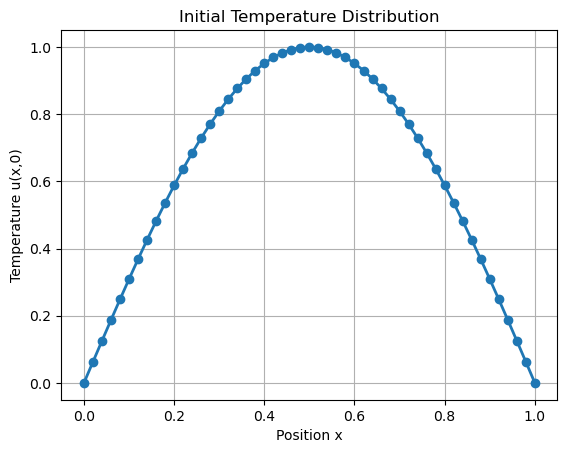

In [34]:
plt.figure()
plt.plot(x, u0, marker='o', linewidth=2)
plt.xlabel("Position x")
plt.ylabel("Temperature u(x,0)")
plt.title("Initial Temperature Distribution")
plt.grid(True)
plt.show()


## 4. Explicit Finite Difference Scheme: FTCS Method 

To numerically simulate the transient heat dissipation process,
the governing partial differential equation is discretized using
an explicit finite difference approach known as the
**Forward Time–Centered Space (FTCS)** method.

This scheme approximates time evolution explicitly while using
a centered difference to model spatial heat diffusion.

### Time Derivative Approximation

The temporal derivative at spatial position $x_i$ and time level $t^n$
is approximated using a forward finite difference:

$$
\frac{\partial u}{\partial t}(x_i, t^n)
\approx
\frac{u_i^{n+1} - u_i^n}{\Delta t}
$$

This approximation describes how the temperature at a given spatial location
changes over a single time step.

---

### Spatial Second Derivative Approximation

The second spatial derivative, which governs diffusive heat transport,
is approximated using a centered finite difference:

$$
\frac{\partial^2 u}{\partial x^2}(x_i, t^n)
\approx
\frac{u_{i-1}^n - 2u_i^n + u_{i+1}^n}{(\Delta x)^2}
$$

This term measures the local curvature of the temperature profile
and determines the rate at which heat flows between neighboring grid points.

---

### Discrete Heat Equation

Substituting the finite difference approximations into the continuous heat equation

$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}
$$

yields the fully discrete form:

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t}
=
\alpha
\frac{u_{i-1}^n - 2u_i^n + u_{i+1}^n}{(\Delta x)^2}
$$

Multiplying both sides by $\Delta t$ and rearranging leads to the explicit update rule:

$$
u_i^{n+1}
=
u_i^n
+
r \left(
u_{i-1}^n - 2u_i^n + u_{i+1}^n
\right)
$$

where the dimensionless parameter

$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}
$$

plays a critical role in determining the stability and accuracy of the method.


---

### Boundary Conditions

The FTCS update formula is applied only to interior grid points:

$$
i = 1, 2, \dots, N-1
$$

The boundary values are enforced explicitly at every time step:

$$
u_0^n = 0, \quad u_N^n = 0
$$

This ensures that the cooling conditions at the rod ends
are consistently maintained throughout the simulation.



In [35]:
# Compute the FTCS stability parameter
r = alpha * dt / dx**2
print("FTCS stability parameter r =", r)

# Perform one FTCS time step: u^0 → u^1
u = u0.copy()          # solution at current time level (n)
u_next = u.copy()      # solution at next time level (n+1)

# Update interior grid points
for i in range(1, N):
    u_next[i] = u[i] + r * (u[i-1] - 2*u[i] + u[i+1])

# Enforce boundary conditions
u_next[0] = 0.0
u_next[-1] = 0.0


FTCS stability parameter r = 0.25


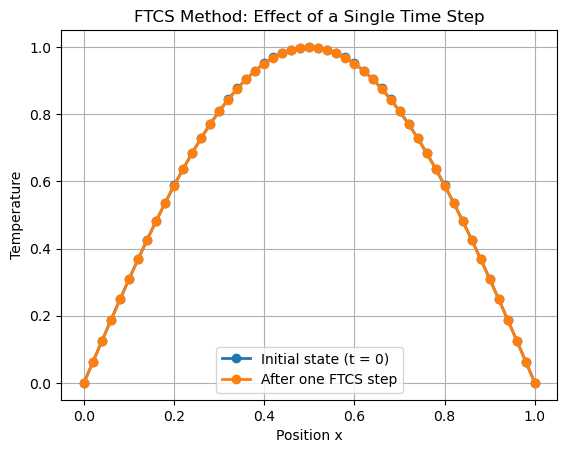

In [36]:
plt.figure()
plt.plot(x, u, marker='o', linewidth=2, label="Initial state (t = 0)")
plt.plot(x, u_next, marker='o', linewidth=2, label="After one FTCS step")
plt.xlabel("Position x")
plt.ylabel("Temperature")
plt.title("FTCS Method: Effect of a Single Time Step")
plt.grid(True)
plt.legend()
plt.show()


## 5. FTCS Solver Over a Time Interval

To model the full transient cooling process,
the FTCS update rule is applied repeatedly over the time interval $[0, T]$.

If $\Delta t$ denotes the time step size,
the total number of time steps required to reach the final simulation time
is given by:

$$
M = \frac{T}{\Delta t}
$$

Starting from the initial temperature distribution,
the solution is advanced in time by iteratively applying
the FTCS update formula for $n = 0, 1, 2, \dots, M$.


In [37]:
# Number of time steps
M = int(T / dt)
print("Number of time steps M =", M)

# Choose a few time indices to save for plotting (snapshots)
snapshot_times = [0, int(0.25*M), int(0.5*M), int(0.75*M), M]
snapshot_labels = ["t=0", "t=0.25T", "t=0.5T", "t=0.75T", "t=T"]

# M tells us how many times we apply the FTCS update.


Number of time steps M = 1000


To simulate the transient cooling process up to the final time $T$,
the total number of time steps required by the FTCS scheme is computed as:

$$
M = \frac{T}{\Delta t}
$$

This value determines how many times the explicit update rule
is applied to advance the numerical solution in time.

To analyze the temporal evolution of the temperature field,
the solution is recorded at several representative time instances.
These snapshots allow the diffusion process to be visualized
and interpreted at different stages of cooling.

In [38]:
# Initialize solution with initial condition
u = u0.copy()
snapshots = [u.copy()]  # store initial state

# Time integration loop
for n in range(1, M + 1):  # time loop
    u_next = u.copy()

    # Update interior spatial points
    for i in range(1, N):  # space loop
        u_next[i] = u[i] + r * (u[i-1] - 2*u[i] + u[i+1])

    # Enforce boundary conditions
    u_next[0] = 0.0
    u_next[-1] = 0.0

    # Advance solution in time
    u = u_next

    # Save snapshots at selected time steps
    if n in snapshot_times[1:]:
        snapshots.append(u.copy())


The temperature distribution is advanced in time using a nested loop structure.
The outer loop iterates over time steps, while the inner loop updates the spatial
grid points according to the FTCS formula.

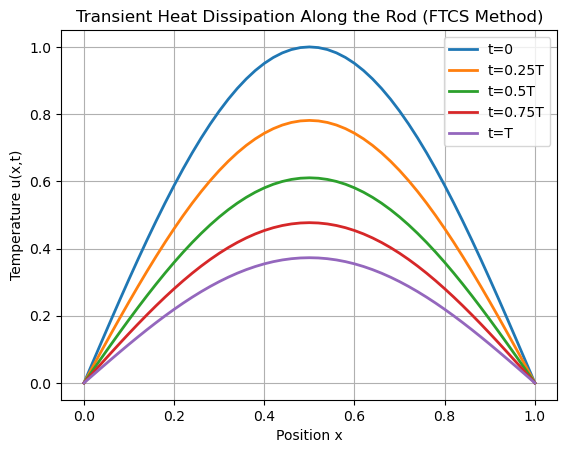

In [39]:
plt.figure()
for profile, label in zip(snapshots, snapshot_labels):
    plt.plot(x, profile, linewidth=2, label=label)

plt.xlabel("Position x")
plt.ylabel("Temperature u(x,t)")
plt.title("Transient Heat Dissipation Along the Rod (FTCS Method)")
plt.grid(True)
plt.legend()
plt.show()


The stored temperature profiles are plotted together to illustrate
how heat dissipates along the rod as time progresses.
This visualization provides a direct physical interpretation
of the numerical results.

## Interpretation of the FTCS Time Integration Results

The FTCS scheme was applied repeatedly to simulate the transient heat
dissipation process over the time interval $[0, T]$.
The total simulation time was divided into $M = T / \Delta t$ discrete
time steps, and the temperature distribution was updated explicitly
at each step.

At every time level, the interior grid points were updated using the FTCS
formula:

$$
u_i^{n+1}
=
u_i^n
+
r \left( u_{i-1}^n - 2u_i^n + u_{i+1}^n \right),
\quad
r = \alpha \frac{\Delta t}{(\Delta x)^2},
$$

while the boundary temperatures were held fixed at zero.

The resulting temperature profiles demonstrate the expected physical behavior
of heat diffusion in a cooling rod. The initially peaked temperature distribution
gradually decreases in amplitude while maintaining a smooth spatial shape.
Heat flows from the warmer central region toward the colder boundaries,
leading to a monotonic decay of temperature over time.

The absence of spurious oscillations or numerical instabilities confirms that
the chosen discretization parameters satisfy the FTCS stability condition
$r \le \frac{1}{2}$.
Overall, the results indicate that the FTCS method provides a stable and
physically consistent numerical approximation for the transient cooling problem.



## 6. Exact (Analytical) Solution for Validation

To assess the accuracy of the numerical simulation,
the FTCS results are compared against a known analytical solution
of the heat diffusion equation.

For a thin rod with fixed-temperature (Dirichlet) boundary conditions,

$$
u(0,t) = 0, \quad u(L,t) = 0,
$$

and an initial temperature distribution of the form

$$
u(x,0) = \sin\!\left(\frac{\pi x}{L}\right),
$$

the heat equation admits a closed-form solution given by:

$$
u_{\text{exact}}(x,t)
=
\exp\!\left(-\alpha \left(\frac{\pi}{L}\right)^2 t\right)
\sin\!\left(\frac{\pi x}{L}\right).
$$

This analytical solution represents the exponential decay of a single
diffusion mode and provides an ideal benchmark for validating
the numerical FTCS implementation.


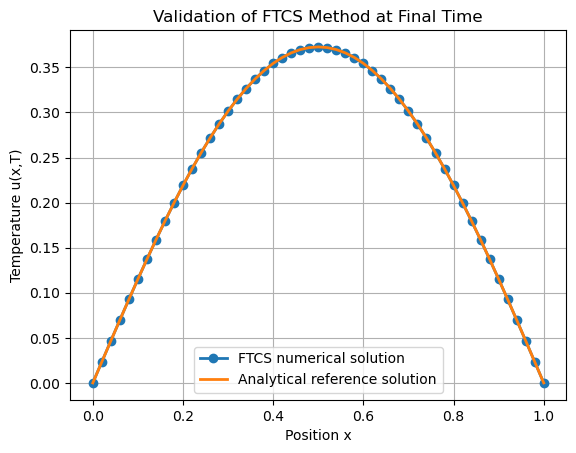

In [40]:
# Exact analytical solution at final time T
u_exact_T = np.exp(-alpha * (np.pi / L)**2 * T) * np.sin(np.pi * x / L)

# Numerical solution at final time T (FTCS result)
u_num_T = u.copy()

plt.figure()
plt.plot(x, u_num_T, marker='o', linewidth=2, label="FTCS numerical solution")
plt.plot(x, u_exact_T, linewidth=2, label="Analytical reference solution")
plt.xlabel("Position x")
plt.ylabel("Temperature u(x,T)")
plt.title("Validation of FTCS Method at Final Time")
plt.grid(True)
plt.legend()
plt.show()


## Comparison of FTCS Numerical Solution with Exact Solution


The numerical temperature distribution obtained using the FTCS method
is compared with the analytical reference solution at the final simulation time $t = T$.

The plotted results indicate that the FTCS solution overlaps almost perfectly
with the analytical solution across the entire spatial domain.
This agreement confirms the correctness of the numerical implementation
and demonstrates that the explicit finite difference scheme accurately
captures the transient heat dissipation process.

The close match is expected because the chosen initial condition corresponds
to a single eigenmode of the heat equation.
Under these conditions, the exact solution preserves the spatial shape
of the temperature profile while its amplitude decays exponentially in time.

Any minor discrepancies between the numerical and analytical solutions
can be attributed to truncation errors arising from the finite spatial
and temporal discretization.
However, for the chosen grid resolution and time step size,
these errors remain negligible.


## 7. Error Analysis at Final Time

To quantitatively assess the accuracy of the FTCS method,
the numerical error is evaluated at the final simulation time $t = T$.

The pointwise error at each spatial grid point is defined as:

$$
e_i = u_{\text{num}}(x_i, T) - u_{\text{exact}}(x_i, T).
$$

Two standard error measures are used to characterize the numerical accuracy.

### Maximum Absolute Error (Infinity Norm)

$$
\|e\|_{\infty} = \max_{0 \le i \le N} |e_i|.
$$

This metric captures the largest deviation between the numerical
and analytical solutions.

### Root-Mean-Square (RMS) Error

$$
\text{RMS}(e)
=
\sqrt{\frac{1}{N+1}\sum_{i=0}^{N} e_i^2 }.
$$

The RMS error provides a global measure of the average error magnitude
across the spatial domain.



In [41]:
# Pointwise error at final time
error = u_num_T - u_exact_T

# Infinity norm (maximum absolute error)
err_inf = np.max(np.abs(error))

# Root-Mean-Square (RMS) error
err_l2 = np.sqrt(np.mean(error**2))

print("Error analysis at t = T")
print("Maximum absolute error (L_inf) =", err_inf)
print("RMS error (L2-type)            =", err_l2)


Error analysis at t = T
Maximum absolute error (L_inf) = 6.051956893593502e-05
RMS error (L2-type)            = 4.237217353747975e-05


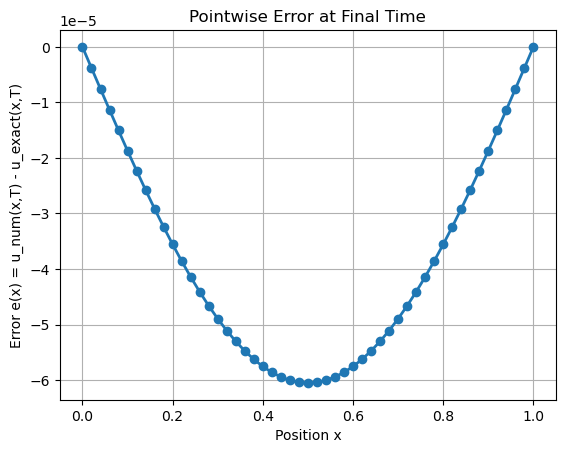

In [42]:
plt.figure()
plt.plot(x, error, marker='o', linewidth=2)
plt.xlabel("Position x")
plt.ylabel("Error e(x) = u_num(x,T) - u_exact(x,T)")
plt.title("Pointwise Error at Final Time")
plt.grid(True)
plt.show()


To further examine the accuracy of the FTCS method,
the pointwise error at the final simulation time $t = T$
is visualized along the spatial domain.


## Interpretation of the Error Results

The plotted error profile illustrates how the numerical error
varies along the rod at the final simulation time.

The error is exactly zero at the boundaries, as both the numerical
and analytical solutions satisfy the same fixed-temperature
(Dirichlet) boundary conditions:
$u(0,t) = u(L,t) = 0$ for all $t$.

The magnitude of the error increases toward the center of the rod,
where the temperature reaches its maximum value and the curvature
of the solution is strongest.
Such behavior is expected, since discretization (truncation) errors
tend to be more pronounced in regions with higher spatial curvature.

Overall, the error remains small throughout the domain,
indicating that the FTCS method provides an accurate numerical
approximation of the transient heat dissipation process
for the chosen discretization parameters.


## 8. Convergence Study via Grid Refinement

To evaluate the convergence properties of the FTCS method,
the cooling problem is solved using multiple spatial grid resolutions.

For each spatial discretization size $N$,
the numerical solution at the final time $t = T$
is compared with the analytical reference solution.
The resulting errors are then analyzed as the grid is refined.

To ensure stability and consistency across different grid sizes,
the time step $\Delta t$ is chosen according to a fixed target value
of the stability parameter:

$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}.
$$

As the spatial grid is refined ($\Delta x \to 0$),
a convergent numerical method is expected to produce
monotonically decreasing errors.



In [43]:
def ftcs_solve_and_error(N, T=0.1, L=1.0, alpha=1.0, r_target=0.4):
    """
    Solves the 1D heat equation using the FTCS method for a given spatial
    resolution N and computes error norms at t = T.

    Returns:
    dx       : spatial step size
    dt       : time step size
    r        : stability parameter
    err_inf  : maximum absolute error
    err_rms  : root-mean-square error
    """
    dx = L / N
    x = np.linspace(0, L, N + 1)

    # Stable time step from target r
    dt = r_target * dx**2 / alpha

    # Adjust dt so that the final time is reached exactly
    M = int(np.ceil(T / dt))
    dt = T / M
    r = alpha * dt / dx**2

    # Initial condition
    u = np.sin(np.pi * x / L)
    u[0] = 0.0
    u[-1] = 0.0

    # Time integration
    for _ in range(M):
        u_next = u.copy()
        for i in range(1, N):
            u_next[i] = u[i] + r * (u[i-1] - 2*u[i] + u[i+1])
        u_next[0] = 0.0
        u_next[-1] = 0.0
        u = u_next

    # Exact solution at t = T
    u_exact = np.exp(-alpha * (np.pi / L)**2 * T) * np.sin(np.pi * x / L)

    # Error norms
    error = u - u_exact
    err_inf = np.max(np.abs(error))
    err_rms = np.sqrt(np.mean(error**2))

    return dx, dt, r, err_inf, err_rms


In [44]:
N_list = [25, 50, 100, 200]
results = []

for Ntest in N_list:
    dx, dt_used, r_used, err_inf, err_rms = ftcs_solve_and_error(
        N=Ntest, T=T, L=L, alpha=alpha, r_target=0.4
    )
    results.append((Ntest, dx, dt_used, r_used, err_inf, err_rms))

print("Convergence results (FTCS at t = T)")
print("N     dx        dt        r        Linf_error      RMS_error")
for (Ntest, dx, dt_used, r_used, err_inf, err_rms) in results:
    print(f"{Ntest:<5d} {dx:<9.6f} {dt_used:<9.6f} {r_used:<8.4f} {err_inf:<14.6e} {err_rms:<.6e}")


Convergence results (FTCS at t = T)
N     dx        dt        r        Linf_error      RMS_error
25    0.040000  0.000637  0.3981   6.722720e-04   4.670584e-04
50    0.020000  0.000160  0.4000   1.695161e-04   1.186850e-04
100   0.010000  0.000040  0.4000   4.236174e-05   2.980562e-05
200   0.005000  0.000010  0.4000   1.058936e-05   7.469156e-06


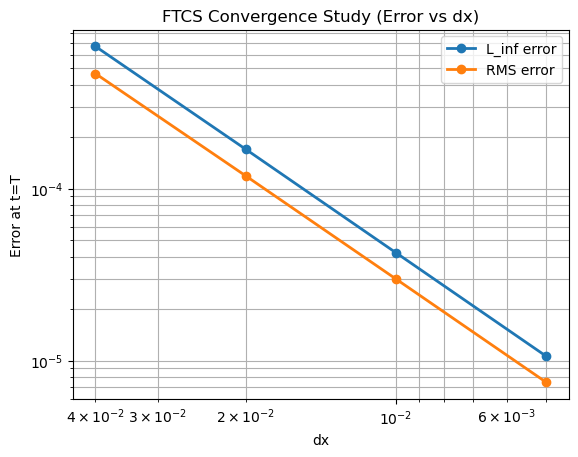

In [45]:
dx_vals = np.array([row[1] for row in results])
err_inf_vals = np.array([row[4] for row in results])
err_rms_vals = np.array([row[5] for row in results])

plt.figure()
plt.loglog(dx_vals, err_inf_vals, marker='o', linewidth=2, label="L_inf error")
plt.loglog(dx_vals, err_rms_vals, marker='o', linewidth=2, label="RMS error")
plt.gca().invert_xaxis()  # smaller dx to the right (optional visual)
plt.xlabel("dx")
plt.ylabel("Error at t=T")
plt.title("FTCS Convergence Study (Error vs dx)")
plt.grid(True, which="both")
plt.legend()
plt.show()


## Interpretation of the Convergence Results

The convergence study examines how the numerical error of the FTCS method
behaves as the spatial grid is progressively refined.
The same physical cooling problem is solved for multiple grid resolutions,
while the time step size is selected to satisfy the FTCS stability condition
using a fixed target value of the stability parameter.

The results show that both the maximum absolute error and the RMS error
decrease systematically as the spatial step size $\Delta x$ is reduced.
In particular, halving $\Delta x$ leads to an approximate fourfold reduction
in the error magnitude, indicating **second-order convergence with respect to space**.

This behavior is consistent with the theoretical accuracy of the FTCS scheme,
which employs a second-order centered finite difference approximation
for the spatial second derivative.
The observed error reduction confirms that the dominant source of numerical
error arises from spatial discretization.

Overall, the convergence results demonstrate that the FTCS method is
numerically consistent and convergent for the transient heat dissipation problem.
As the grid is refined, the numerical solution approaches the analytical reference
solution, validating both the numerical scheme and its implementation.

